# Assignment 4
AnneLouise de Boer
## Average Distances in n-Dimensional Hypercubes

Write a program that makes a graph with the number of dimensions on the horizontal axis using a logarithmic scale and the average distance between two points in an n-dimensional unit hypercube on the vertical axis. Your graph should be the result of generating a number of such pairs of points and averaging over the distances between them.

reading: https://www.kaggle.com/residentmario/curse-of-dimensionality This source shows how the distance between two points increases as you move to higher dimensions. For example (0,0) and (1,1) etc.Points are further away from each other in high dimensional spaces, this is the curse of dimensionality. 

reading: https://martin-thoma.com/curse-of-dimensionality/

- calculate the average distance of k uniformly random sampled points in [0,1]^n

Reading on the curse of dimensionality: https://builtin.com/data-science/curse-dimensionality

I want to give credit to this Github user. 
source: https://gist.github.com/BadreeshShetty/bf9cb1dced8263ef997bcb2c3926569b

In [5]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import random,math 
import matplotlib.pyplot as plt

Looking at dimensions in a range of 1 to 100000 with intervals of 10. 

In [38]:
# Dimensions in range of 1 to 100000 with interval of 10
dimensions = range(1, 1000, 10)

In [56]:
from scipy.spatial import distance

# Making random numbers in range 0 to 1 from a uniform distribution with a given dimension
#Suppose that we have n data points uniformally distributed inside the hypercube.
def random_point_gen(dimension): 
    m = []
    for i in range(dimension):
        m.append(random.uniform(0, 1))
    return m 

# Calculating the eudlidean distance between two coordinates 
def random_distances_comparison(dimension,number_pairs): 
     return [distance.euclidean(random_point_gen(dimension),random_point_gen(dimension)) 
             for _ in range(number_pairs)]   
    
#average distance, the sum divided by the length of the array of euclidean distances           
def mean(x): 
     return sum(x) / len(x)

In [57]:
#test random coordinates in 3 dimensions and 4 dimensions
print(random_point_gen(3))
print(random_point_gen(4))
print(random_distances_comparison(3, 10)) #10 euclidean distances for 3 dimensional coordinates

[0.2801110012773852, 0.38391385817201285, 0.23237241364208983]
[0.9090254906794882, 0.9815284809562838, 0.02743450999572783, 0.48398734199837423]
[0.5260666877565827, 0.7152238179249475, 0.7602095287637471, 0.6755845247828194, 0.6379529802231985, 0.5116173079817392, 0.3003007136105633, 0.44595477109023324, 0.38570559472185284, 0.5400245477492908]


In [58]:
avg_distances = [] 

dummy = np.empty((20,2)) 
dist = pd.DataFrame(dummy) 
dist.columns = ["Dimension","Avg_Distance"] 
 
random.seed(34) 
i = 0 
for dims in dimensions: 
    #averaging over 1000 observations per dimension (number_pairs)
    distances = random_distances_comparison(dims, 1000)   
    avg_distances.append(mean(distances))     
     
    dist.loc[i,"Dimension"] = dims 
    dist.loc[i,"Avg_Distance"] = mean(distances) 
   #for each dimension the average distance        
    print(dims,mean(distances))
    i = i+1

1 0.3304377974569266
11 1.3401740854448738
21 1.8494625706998342
31 2.2487295610797404
41 2.6202602524132663
51 2.91973469532458
61 3.183914940287806
71 3.434805652393278
81 3.6826431561987985
91 3.890026049978175
101 4.102033469297674
111 4.3006950280188
121 4.4789574688837055
131 4.6569193125841295
141 4.84170968354576
151 5.016737615045645
161 5.1722480288779495
171 5.341617534556972
181 5.482410105951151
191 5.640760079699207
201 5.786641570271147
211 5.920981165965469
221 6.054163900861288
231 6.19572144581478
241 6.336261073257346
251 6.466224354537698
261 6.590635333390233
271 6.711282760397099
281 6.8357574085228245
291 6.957750902317856
301 7.0795729834533345
311 7.199200195552326
321 7.305734648783316
331 7.4230662750429195
341 7.522340445485527
351 7.659774299500279
361 7.746100205112718
371 7.851900620006002
381 7.9691780127116205
391 8.074556540735285
401 8.174458532846733
411 8.282459688582135
421 8.375312755707315
431 8.473494413300168
441 8.573592190150826
451 8.6624102

No handles with labels found to put in legend.


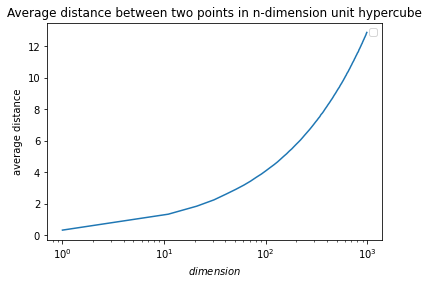

In [59]:
plt.plot(dist["Dimension"],dist["Avg_Distance"])
plt.title("Average distance between two points in n-dimension unit hypercube")
plt.xlabel('$dimension$')
plt.xscale('log')
plt.ylabel('average distance')
plt.legend(loc='best') 
plt.show();

More on the Robins constant: https://blogs.mathworks.com/cleve/2017/09/27/how-far-apart-are-two-random-points-in-a-hypercube/

The average distance between two random points increases expontentially. Thus the higher the dimension, the more data is needed to counteract the curse of dimensionality.